In [2]:
#Importing the libraries
from nsepy import get_history as gh
import datetime as dt
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from pmdarima import auto_arima 
import warnings 
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.statespace.sarimax import SARIMAX 


In [3]:
import yfinance as yf

In [4]:

ticker = "SBIN.NS" # Assuming 'SBIN' is a stock listed on the NSE
start = dt.datetime(2013, 1, 1)
end = dt.datetime(2019, 12, 31)

# Download the historical stock prices
data = yf.download(ticker, start=start, end=end)

C:\Users\Om Pc\AppData\Local\Programs\Python\Python310\lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


In [5]:
#print(data)

In [6]:
#Data Preprocessing
data['Date'] = data.index
data2 = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
data2['Date'] = data['Date']
data2['Open'] = data['Open']
data2['High'] = data['High']
data2['Low'] = data['Low']
data2['Close'] = data['Close']

In [7]:
#print(data2)

In [8]:
#####################ARIMA###############################
# Ignore harmless warnings 
warnings.filterwarnings("ignore") 


In [9]:
# Ignore harmless warnings 
warnings.filterwarnings("ignore") 
# Fit auto_arima function to Stock Market Data
stepwise_fit = auto_arima(data2['Close'], start_p = 1, start_q = 1, max_p = 3, max_q = 3, m = 12, start_P = 0, seasonal = True, d = None, D = 1, trace = True, error_action ='ignore', suppress_warnings = True, stepwise = True)       

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=13.73 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=14833.485, Time=0.16 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=11247.990, Time=3.15 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=13265.818, Time=6.13 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=14833.180, Time=0.16 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=11668.958, Time=0.53 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=11099.621, Time=15.68 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=39.60 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=14.54 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=14831.211, Time=9.70 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=11095.542, Time=20.15 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=11242.183, Time=4.91 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=44.48 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=10.06 sec
 ARIMA(3,0,0)(2,1,0)[12] int

In [10]:
start = dt.datetime(2020, 1, 1)
end = dt.datetime(2021, 12, 31)

# Download the historical stock prices
data6 = yf.download(ticker, start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


In [14]:
data6.index.freq='MS'

ValueError: Inferred frequency None from passed values does not conform to passed frequency MS

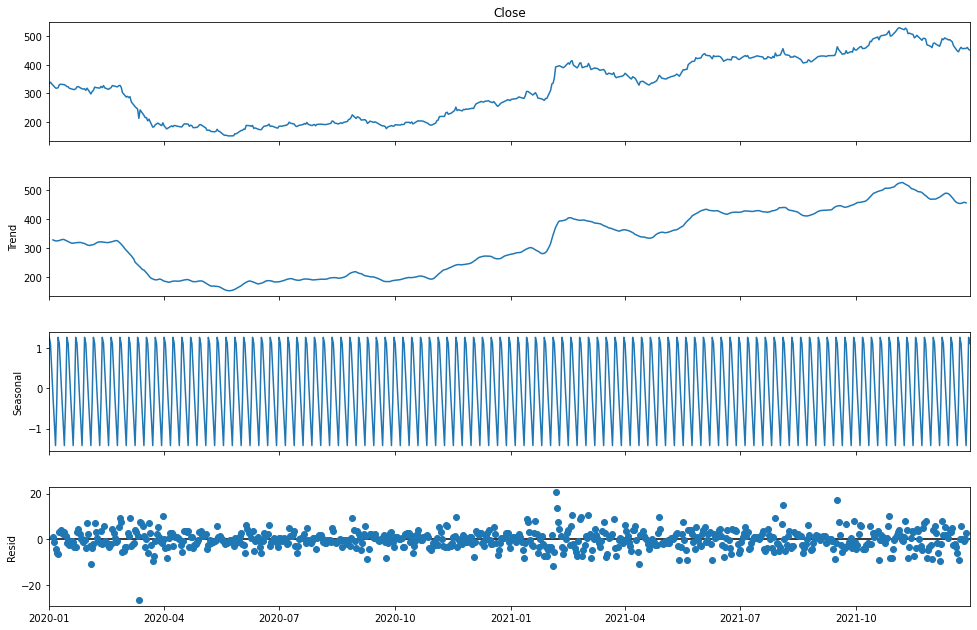

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Fill missing values with linear interpolation
data6['Close'] = data6['Close'].interpolate(method='linear')

# Perform seasonal decomposition
decomposition = seasonal_decompose(data6['Close'], model='additive')

# Plot the decomposition
fig = decomposition.plot()
fig.set_size_inches(15, 10)


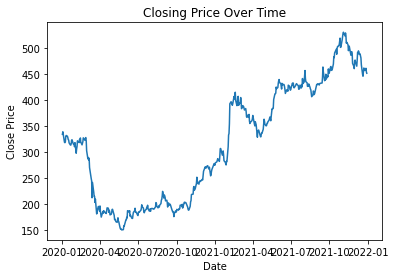

In [28]:
import matplotlib.pyplot as plt

plt.plot(data6['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Closing Price Over Time')
plt.show()


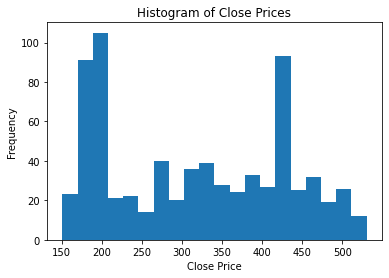

In [29]:
plt.hist(data6['Close'], bins=20)
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.title('Histogram of Close Prices')
plt.show()


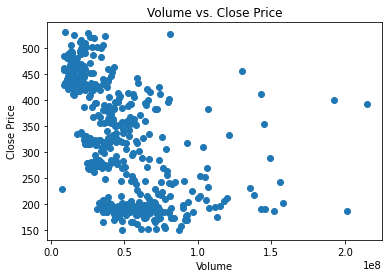

In [30]:
plt.scatter(data6['Volume'], data6['Close'])
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.title('Volume vs. Close Price')
plt.show()


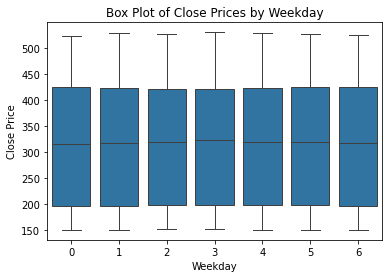

In [36]:
import seaborn as sns

# Extract weekday from the index
data6['Weekday'] = data6.index.weekday

# Create box plot
sns.boxplot(x=data6['Weekday'], y=data6['Close'])
plt.xlabel('Weekday')
plt.ylabel('Close Price')
plt.title('Box Plot of Close Prices by Weekday')
plt.show()


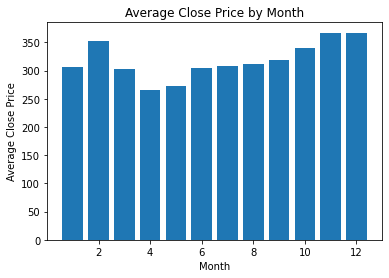

In [35]:
data6['Month'] = data6.index.month
monthly_mean = data6.groupby('Month')['Close'].mean()

plt.bar(monthly_mean.index, monthly_mean.values)
plt.xlabel('Month')
plt.ylabel('Average Close Price')
plt.title('Average Close Price by Month')
plt.show()


In [11]:

# Split data into train / test sets 
train = data6.iloc[:len(data6)-60] 
test = data6.iloc[len(data6)-60:]

In [22]:
# Fit a SARIMAX
model = SARIMAX(data6['Close'],  order = (0, 1, 1),  seasonal_order =(2, 1, 1, 12)) 

In [23]:
result = model.fit() 

In [24]:
print(result)

In [25]:
start = len(train) 
end = len(train) + len(test) - 1

In [26]:
end

497

In [27]:
  
# Predictions for one-year against the test set 
predictions = result.predict(start, end, typ = 'levels').rename("Predictions") 

In [28]:
#print(predictions)

<Axes: xlabel='Date'>

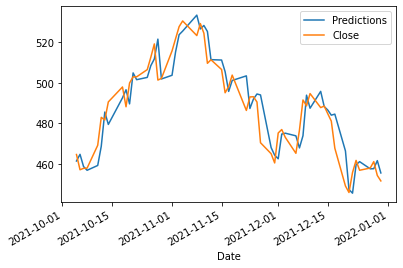

In [29]:
# plot predictions and actual values 
predictions.plot(legend = True) 
test['Close'].plot(legend = True)

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming 'actual_values' and 'predicted_values' are lists or arrays of actual and predicted values
actual_values = test['Close']
predicted_values = predictions

mae = mean_absolute_error(actual_values, predicted_values)
mse = mean_squared_error(actual_values, predicted_values)
rmse = np.sqrt(mse)
r2 = r2_score(actual_values, predicted_values)

# Calculate accuracy in percentage
accuracy_percentage = ((max(actual_values) - mae) / max(actual_values)) * 100

print("Mean Absolute Error (MAE) for LSTM:", mae)
print("Mean Squared Error (MSE) for LSTM:", mse)
print("Root Mean Squared Error (RMSE) for LSTM:", rmse)
print("R-squared (R2) Score for LSTM:", r2)
# print("Accuracy Percentage for ARIMA:", accuracy_percentage)


Mean Absolute Error (MAE) for LSTM: 6.623565288171951
Mean Squared Error (MSE) for LSTM: 73.98885770218172
Root Mean Squared Error (RMSE) for LSTM: 8.601677609756234
R-squared (R2) Score for LSTM: 0.857811771051614


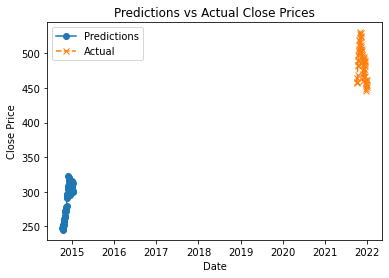

In [21]:
plt.plot(predictions, marker='o', label='Predictions')
plt.plot(test['Close'], marker='x', label='Actual', linestyle='--')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Predictions vs Actual Close Prices')
plt.show()


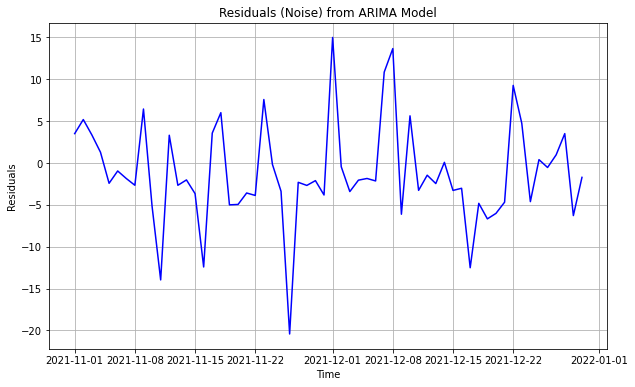

In [76]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Assuming you have already fitted an ARIMA model and have the actual values and predictions
# Replace 'actual_values' and 'predicted_values' with your actual and predicted values
# Replace 'order' with the order of your ARIMA model

# Calculate residuals
residuals = test['Close'] - predictions

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals, color='blue')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.title('Residuals (Noise) from ARIMA Model')
plt.grid(True)
plt.show()

In [72]:
from sklearn.metrics import mean_squared_error 
from statsmodels.tools.eval_measures import rmse 

# RMSE for ARIMA model
err_ARIMA = rmse(test["Close"], predictions) 
print('RMSE with ARIMA', err_ARIMA)


RMSE with ARIMA 8.601677609756234


In [32]:
#############LSTM########################
train_set = data2.iloc[0:1333:, 1:2].values
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train_set)
X_train = []
y_train = []
for i in range(60, 1333):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0]) 
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [33]:

#Defining the LSTM Recurrent Model
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [34]:
print(len(X_train))

1273


In [35]:

#Compiling and fitting the model
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 40, batch_size = 16)

Epoch 1/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 24s 142ms/step - loss: 0.0742
Epoch 2/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 11s 133ms/step - loss: 0.0101
Epoch 3/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 11s 132ms/step - loss: 0.0086
Epoch 4/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 11s 132ms/step - loss: 0.0079
Epoch 5/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 11s 131ms/step - loss: 0.0064
Epoch 6/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - loss: 0.0081
Epoch 7/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.0065
Epoch 8/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 0.0060
Epoch 9/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - loss: 0.0062
Epoch 10/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - loss: 0.0055
Epoch 11/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - loss: 0.0046
Epoch 12/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - loss: 0.0040
Epoch 13/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - loss: 0.0042
Epoch 14/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 0.0051
Epoch 15/40
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 0

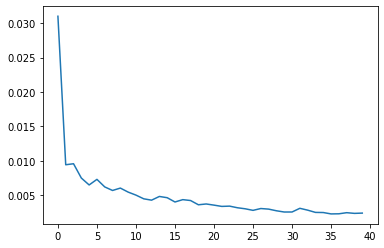

In [36]:
loss_per_epoch = regressor.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [37]:
start = dt.datetime(2020, 1, 1)
end = dt.datetime(2021, 12, 31)

# Download the historical stock prices
data6 = yf.download(ticker, start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


In [47]:

#Fetching the test data and preprocessing
testdataframe = data6
testdataframe['Date'] = testdataframe.index
testdata = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
testdata['Date'] = testdataframe['Date']
testdata['Open'] = testdataframe['Open']
testdata['High'] = testdataframe['High']
testdata['Low'] = testdataframe['Low']
testdata['Close'] = testdataframe['Close']
real_stock_price = testdata.iloc[:, 1:2].values
dataset_total = pd.concat((data2['Open'], testdata['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(testdata) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
# for i in range(60, 235):
#     X_test.append(inputs[i-60:i, 0])
for i in range(60, len(inputs)):
    sequence = inputs[i-60:i, 0]
    if len(sequence) == 60: # Ensure the sequence has 60 elements
        X_test.append(sequence)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [52]:
testdataframe[:100]

,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2020-01-01,334.700012,335.950012,332.149994,334.450012,320.078278,17379320,2020-01-01
2020-01-02,334.500000,339.850006,333.350006,339.299988,324.719818,20324236,2020-01-02
2020-01-03,337.950012,337.950012,332.000000,333.700012,319.360474,21853208,2020-01-03
2020-01-06,331.700012,331.700012,317.700012,319.000000,305.292175,35645325,2020-01-06
2020-01-07,324.450012,327.000000,315.399994,318.399994,304.717926,50966826,2020-01-07
...,...,...,...,...,...,...,...
2020-05-22,152.000000,155.600006,149.449997,150.850006,144.367783,87064198,2020-05-22
2020-05-26,152.399994,153.199997,150.199997,151.399994,144.894135,48275988,2020-05-26
2020-05-27,151.949997,160.800003,150.800003,158.600006,151.784760,88195120,2020-05-27


In [14]:
print(len(inputs))

558


In [48]:
#Making predictions on the test data
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


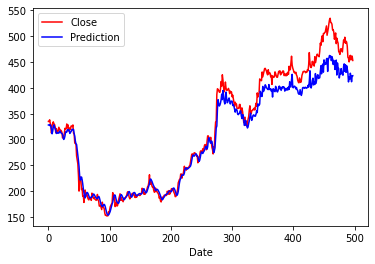

In [49]:
#Visualizing the prediction
plt.figure()
plt.plot(real_stock_price, color = 'r', label = 'Close')
plt.plot(predicted_stock_price, color = 'b', label = 'Prediction')
#plt.plot(predictions, color = 'g', label = 'ARIMA')

plt.xlabel('Date')
plt.legend()
plt.show()

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming 'actual_values' and 'predicted_values' are lists or arrays of actual and predicted values
actual_values = real_stock_price
predicted_values = predicted_stock_price

mae = mean_absolute_error(actual_values, predicted_values)
mse = mean_squared_error(actual_values, predicted_values)
rmse = np.sqrt(mse)
r2 = r2_score(actual_values, predicted_values)

# Calculate accuracy in percentage
accuracy_percentage = ((max(actual_values) - mae) / max(actual_values)) * 100

print("Mean Absolute Error (MAE) for ARIMA:", mae)
print("Mean Squared Error (MSE) for ARIMA:", mse)
print("Root Mean Squared Error (RMSE) for ARIMA:", rmse)
print("R-squared (R2) Score for ARIMA:", r2)
# print("Accuracy Percentage:", accuracy_percentage)


Mean Absolute Error (MAE) for ARIMA: 17.950144112828266
Mean Squared Error (MSE) for ARIMA: 624.5080762514634
Root Mean Squared Error (RMSE) for ARIMA: 24.99015958835524
R-squared (R2) Score for ARIMA: 0.949214773748722


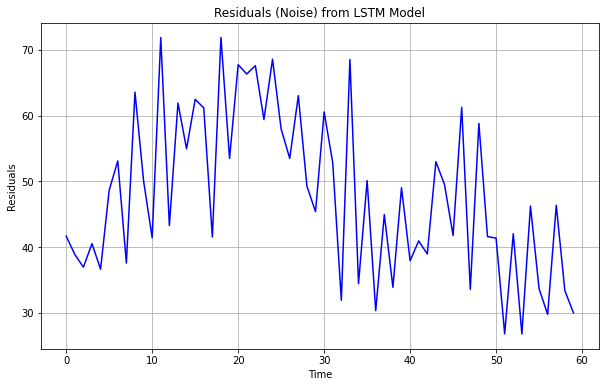

In [80]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Assuming you have already fitted an ARIMA model and have the actual values and predictions
# Replace 'actual_values' and 'predicted_values' with your actual and predicted values
# Replace 'order' with the order of your ARIMA model

# Calculate residuals
residuals = real_stock_price[len(real_stock_price)-60:] - predicted_stock_price[len(predicted_stock_price)-60:] 

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals, color='blue')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.title('Residuals (Noise) from LSTM Model')
plt.grid(True)
plt.show()

In [67]:
plt.fill_between(real_stock_price.index, real_stock_price.values, predicted_stock_price.values, color='skyblue', alpha=0.3, label='Difference')
plt.plot(real_stock_price, color='red', label='Actual Close')
plt.plot(predicted_stock_price, color='blue', label='Predicted Close')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Prices')
plt.legend()
plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [44]:
print(dataset_total)

Date
2013-01-01    240.490005
2013-01-02    245.000000
2013-01-03    246.000000
2013-01-04    246.000000
2013-01-07    249.000000
                 ...    
2022-12-26    574.000000
2022-12-27    600.400024
2022-12-28    600.900024
2022-12-29    600.000000
2022-12-30    615.250000
Name: Open, Length: 2216, dtype: float64


In [36]:
print(len(dataset_total))

2216


In [65]:
print(len(testdata))

747


In [66]:
print(len(inputs))

807


In [17]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assuming 'data2' contains your entire dataset
inputs = dataset_total[:-100].values
# data7 = data2['Open']
# inputs = data7[:-200].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

# Check if there are enough data points to create sequences
if len(inputs) < 1600:
    print("Not enough data points to create input sequences for prediction.")
else:
    X_pred = []  # Prepare list for input sequences

    # Create input sequences for prediction 
    for i in range(1700, len(inputs)):  # Extend the range by 60 steps
        start_index = max(0, i - 1700)  # Ensure start index doesn't go negative
        sequence = inputs[start_index:i, 0]
        X_pred.append(sequence)

    # Pad sequences to ensure uniform length
    X_pred = pad_sequences(X_pred, maxlen=1700, dtype='float32', padding='pre', truncating='pre')

    # Reshape for LSTM model input
    X_pred = np.reshape(X_pred, (X_pred.shape[0], -1, 1))  
    
    # Predict future values iteratively
    predicted_stock_price = []
    
    for i in range(100):
        # Predict one step ahead
        pred = regressor.predict(X_pred[i:i+1])  # Predicting only one step ahead
        predicted_stock_price.append(pred)
    
        # Concatenate pred with the last element of X_pred and reshape to match input shape
        pred = pred.reshape(1, 1, 1)
        pred = np.repeat(pred, X_pred.shape[1], axis=1)  # Repeat pred to match X_pred shape along axis 1
        X_pred = np.concatenate((X_pred, pred), axis=0)
    
    # Inverse transform to get actual values
    predicted_stock_price = sc.inverse_transform(np.array(predicted_stock_price).reshape(-1, 1))




1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 719ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [1]:
X_pred[0]

NameError: name 'X_pred' is not defined

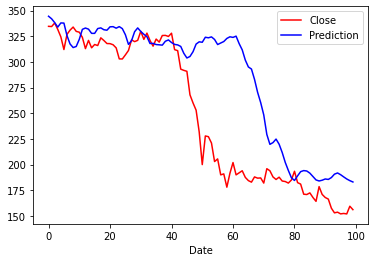

In [23]:
plt.figure()
plt.plot(real_stock_price[:100], color = 'r', label = 'Close')
#plt.plot(dataset_total[-100:].values, color = 'r', label = 'Close')
plt.plot(predicted_stock_price, color = 'b', label = 'Prediction')
#plt.plot(predictions, color = 'g', label = 'ARIMA')

plt.xlabel('Date')
plt.legend()
plt.show()

In [43]:
import numpy as np

# 'center_line' is the y-coordinate of the center line
def invert_data(predicted_stock_price, center_line):
    inverted_data = []
    for point in predicted_stock_price:
        # Calculate the distance from the center line
        distance = point - center_line
        # Calculate the mirror image
        inverted_point = center_line - distance
        # Add the inverted point to the result
        inverted_data.append(inverted_point)
    return inverted_data

center_line = np.mean(predicted_stock_price)  # Use the mean as the center line
inverted_predicted_data = invert_data(predicted_stock_price, center_line)

In [1]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming 'actual_values' and 'predicted_values' are lists or arrays of actual and predicted values
actual_values = real_stock_price[:100]
predicted_values = predicted_stock_price

mae = mean_absolute_error(actual_values, predicted_values)
mse = mean_squared_error(actual_values, predicted_values)
rmse = np.sqrt(mse)
r2 = r2_score(actual_values, predicted_values)

# Calculate accuracy in percentage
accuracy_percentage = ((max(actual_values) - mae) / max(actual_values)) * 100

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)
print("Accuracy Percentage:", accuracy_percentage)


NameError: name 'real_stock_price' is not defined

In [120]:
from sklearn.metrics import mean_absolute_error

# Assuming actual_values and predicted_values are arrays or lists of actual and predicted values
actual_values = real_stock_price[:100]
predicted_values = predicted_stock_price#inverted_predicted_data

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_values, predicted_values)

# Calculate accuracy in percentage
accuracy_percentage = (1 - (mae / np.max(actual_values))) * 100

print("Accuracy:", accuracy_percentage, "%")


Accuracy: 89.97850617115164 %


In [31]:
from sklearn.metrics import mean_absolute_error

# Assuming actual_values and predicted_values are arrays or lists of actual and predicted values
actual_values = np.array([[272.75], [254.], [258.5], [251.5], [250.1000061], [258.], [256.20001221], [256.95001221], [256.45001221], [259.29998779], [256.3999939], [264.3999939], [270.3999939], [270.75], [276.], [265.79998779], [284.95001221], [283.1499939], [283.], [293.3500061], [312.3999939], [316.], [313.8999939], [318.95001221], [318.25], [316.20001221], [314.70001221], [316.04998779], [306.95001221], [312.], [324.], [325.79998779], [332.], [329.25], [331.45001221], [329.], [338.], [335.95001221], [346.8500061], [348.8500061], [343.8999939], [341.], [334.1000061], [343.], [336.70001221], [318.95001221], [317.20001221], [311.20001221], [314.], [325.20001221], [335.95001221], [333.25], [335.], [327.3500061], [330.3500061], [335.70001221], [333.20001221], [333.], [333.3999939], [337.75]])

predicted_values = np.array([[269.9116], [268.13873], [265.77136], [263.5487], [263.90884], [272.91556], [272.44824], [270.8785], [267.37146], [265.74707], [269.53326], [268.4025], [262.1271], [264.17484], [271.7662], [277.3935], [283.26492], [284.79697], [284.5202], [282.4826], [281.70078], [292.6072], [296.634], [303.71396], [315.3542], [321.99408], [321.63306], [324.9416], [326.00806], [328.367], [333.09418], [335.50134], [334.16983], [334.44516], [336.48602], [341.22516], [349.09772], [346.51706], [341.4954], [337.96985], [338.621], [343.53644], [349.1593], [353.10526], [352.3743], [349.85455], [348.6563], [347.02594], [342.50192], [339.82056], [338.1791], [338.99146], [343.40744], [345.81033], [347.9566], [334.67624], [318.38043], [320.1582], [333.10117], [342.29376]])

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(actual_values, predicted_values)

# Calculate accuracy percentage
accuracy_percentage = (1 - (mae / np.max(actual_values))) * 100

print("Accuracy:", accuracy_percentage, "%")


Accuracy: 96.7517623307465 %


In [33]:
from sklearn.metrics import mean_absolute_error

# Convert the predicted and actual values to numpy arrays
predicted_values = inverted_predicted_data
actual_values = real_stock_price

# Calculate the absolute error
absolute_errors = np.abs(predicted_values - actual_values)

# Calculate the accuracy percentage for each predicted value
accuracies = (1 - absolute_errors / actual_values) * 100

# Print the actual values, predicted values, their difference, and accuracy
for i, (actual, predicted, diff, accuracy) in enumerate(zip(actual_values, predicted_values, absolute_errors, accuracies)):
    print(f"Value {i + 1}:")
    print(f"  Actual: {actual[0]}")
    print(f"  Predicted: {predicted[0]}")
    print(f"  Difference: {diff[0]}")
    print(f"  Accuracy: {accuracy[0]:.2f}%")



Value 1:
  Actual: 272.75
  Predicted: 269.9115905761719
  Difference: 2.838409423828125
  Accuracy: 98.96%
Value 2:
  Actual: 254.0
  Predicted: 268.13873291015625
  Difference: 14.13873291015625
  Accuracy: 94.43%
Value 3:
  Actual: 258.5
  Predicted: 265.7713623046875
  Difference: 7.2713623046875
  Accuracy: 97.19%
Value 4:
  Actual: 251.5
  Predicted: 263.5487060546875
  Difference: 12.0487060546875
  Accuracy: 95.21%
Value 5:
  Actual: 250.10000610351562
  Predicted: 263.9088439941406
  Difference: 13.808837890625
  Accuracy: 94.48%
Value 6:
  Actual: 258.0
  Predicted: 272.9155578613281
  Difference: 14.915557861328125
  Accuracy: 94.22%
Value 7:
  Actual: 256.20001220703125
  Predicted: 272.4482421875
  Difference: 16.24822998046875
  Accuracy: 93.66%
Value 8:
  Actual: 256.95001220703125
  Predicted: 270.8785095214844
  Difference: 13.928497314453125
  Accuracy: 94.58%
Value 9:
  Actual: 256.45001220703125
  Predicted: 267.3714599609375
  Difference: 10.92144775390625
  Accura

In [75]:
predicted_stock_price

array([[334.85013],
       [331.54303],
       [329.28702],
       [324.91977],
       [330.41745],
       [327.6312 ],
       [315.4172 ],
       [311.04178],
       [307.0923 ],
       [307.53818],
       [314.7706 ],
       [323.48047],
       [322.55966],
       [322.61252],
       [318.00458],
       [319.07126],
       [323.67612],
       [323.204  ],
       [322.66583],
       [322.93344],
       [325.99408],
       [324.65555],
       [324.029  ],
       [326.34857],
       [322.84375],
       [317.29913],
       [308.60162],
       [315.29904],
       [321.0898 ],
       [323.3474 ],
       [320.3685 ],
       [318.87726],
       [315.7078 ],
       [308.38538],
       [311.14218],
       [308.6022 ],
       [309.07962],
       [308.7531 ],
       [312.9793 ],
       [312.60727],
       [310.09464],
       [309.2554 ],
       [308.6691 ],
       [306.77274],
       [299.93335],
       [297.21805],
       [299.2897 ],
       [302.97653],
       [310.17484],
       [310.9288 ],


In [81]:
data6[::-100]

,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2022-12-30,615.250000,620.549988,611.349976,613.700012,602.001587,13052895,2022-12-30
2022-08-04,543.650024,544.000000,524.200012,533.250000,523.085144,18072293,2022-08-04
2022-03-11,466.399994,474.799988,462.000000,470.350006,454.294373,22091309,2022-03-11
2021-10-18,494.000000,501.000000,491.700012,497.950012,480.952240,20084248,2021-10-18
2021-05-25,415.100006,415.500000,408.500000,412.350006,394.630798,56048127,2021-05-25
2020-12-24,265.000000,268.850006,264.649994,266.850006,255.383102,28585509,2020-12-24
2020-08-04,193.350006,193.800003,190.500000,191.600006,183.366714,43866676,2020-08-04
2020-03-06,268.000000,274.399994,253.949997,270.500000,258.876251,106043172,2020-03-06


In [84]:
from sklearn.metrics import accuracy_score

In [92]:
accuracy_score(predicted_stock_price,real_stock_price[:100])

ValueError: continuous is not supported

In [87]:
data6

,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2020-01-01,334.700012,335.950012,332.149994,334.450012,320.078278,17379320,2020-01-01
2020-01-02,334.500000,339.850006,333.350006,339.299988,324.719818,20324236,2020-01-02
2020-01-03,337.950012,337.950012,332.000000,333.700012,319.360474,21853208,2020-01-03
2020-01-06,331.700012,331.700012,317.700012,319.000000,305.292175,35645325,2020-01-06
2020-01-07,324.450012,327.000000,315.399994,318.399994,304.717926,50966826,2020-01-07
...,...,...,...,...,...,...,...
2022-12-26,574.000000,601.700012,570.700012,597.099976,585.718018,13201587,2022-12-26
2022-12-27,600.400024,603.099976,593.299988,601.900024,590.426575,9638618,2022-12-27
2022-12-28,600.900024,607.000000,598.549988,601.049988,589.592712,7988631,2022-12-28


In [89]:
X=data6.drop('Close',axis=1)
Y=data6('Close')

TypeError: 'DataFrame' object is not callable